# This sheet has 3 prediction models - Random Forest, XGBoost and SVM

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('compiled_cleaned_songs.csv', sep = ',')
df_col = df.columns.values.tolist()
y=['Hot']
x =[i for i in df_col if i not in y]
del x[0:4]
X = df[x] #### Covariates
Y = df[y] #### Dependable variable

In [6]:
###Dummy variables created to handle discrete variables #######
col =['Key','Mode','Time_Signature']
for feat in col:
    col_list='feat'+'_'+ feat
    col_list = pd.get_dummies(X[feat], prefix=feat)
    X1=X.join(col_list)
    X=X1
col =['Key','Mode','Time_Signature']
X_col =X.columns.values.tolist()
final_cols=[i for i in X_col if i not in col]

In [7]:
X1 = X[final_cols]
X2 = X1.drop(columns=['Key_0', 'Mode_0', 'Time_Signature_0']) #### Final dataframe for analysis

###### RANDOM FOREST

In [67]:
#### Recursive Feature Elimination ####
from sklearn.feature_selection import RFE
rf = RandomForestClassifier()
rfe = RFE(rf)
rfe = rfe.fit(X2, Y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True False False False False False False False False False False  True
 False False False False]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  4 13  7  8  5  2  3  6 10  9  1
 15 12 11 14]


In [68]:
X2_col = X2.columns.values.tolist()

indices = 13,14,15,16,17,18,19,20,21,22,24,25,26,27
X2_col_mod = [i for j, i in enumerate(X2_col) if j not in indices]
X2_mod = X2[X2_col_mod] ### consists of only significant features ####

In [71]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X2_mod,Y,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#fit the model
rf.fit(X_train,y_train.values.ravel())

(8663, 14)
(8663, 1)
(2166, 14)
(2166, 1)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [72]:
cv_scores = cross_val_score(rf, X_train, y_train.values.ravel(), cv=5)
print(cv_scores)
mean_score=scores.mean()
print("Mean:", mean_score)

[0.92787074 0.92960185 0.92556261 0.93133295 0.93067591]
Mean: 0.8270043332255144


In [73]:
y_pred = rf.predict(X_test)
print('Accuracy of Random forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of Random forest classifier on test set: 0.93


In [74]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.98      0.96      1958
          1       0.75      0.47      0.57       208

avg / total       0.93      0.93      0.93      2166



In [75]:
print(confusion_matrix(y_test, y_pred))

[[1925   33]
 [ 111   97]]


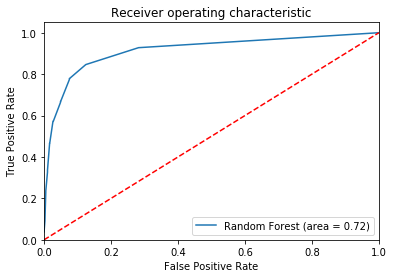

In [76]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

###### XGBOOST CLASSIFIER

In [79]:
#### Recursive Feature Elimination ####
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier()
rfe = RFE(xgb)
rfe = rfe.fit(X2, Y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
 False False False False False False False  True False  True False False
 False False False False]
[ 1  1  1  1  1  1  1  1  1  1  1  1  3 15 14  5 10 11  4  1  8  1  6  7
  9  2 12 13]


In [80]:
X2_col = X2.columns.values.tolist()

indices = 12,13,14,15,16,17,18,20,22,23,24,25,26,27
X2_col_mod_1 = [i for j, i in enumerate(X2_col) if j not in indices]
X2_mod_1 = X2[X2_col_mod_1]

In [93]:
# split into train and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2_mod_1,Y,test_size=0.2)
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

#fit the model
xgb.fit(X_train1,y_train1.values.ravel())

(8663, 14)
(8663, 1)
(2166, 14)
(2166, 1)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [94]:
cv_scores = cross_val_score(xgb, X_train1, y_train1.values.ravel(), cv=5)
print(cv_scores)
mean_score=scores.mean()
print("Mean:", mean_score)

C:\Users\Varun Bhatia\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Varun Bhatia\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Varun Bhatia\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Varun Bhatia\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

[0.93137255 0.93710329 0.93591224 0.94226328 0.9295612 ]
Mean: 0.8270043332255144


C:\Users\Varun Bhatia\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [95]:
y_pred1 = xgb.predict(X_test1)
print('Accuracy of XG Booster classifier on test set: {:.2f}'.format(xgb.score(X_test1, y_test1)))

Accuracy of XG Booster classifier on test set: 0.94


C:\Users\Varun Bhatia\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Varun Bhatia\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [96]:
print(classification_report(y_test1, y_pred1))
print(confusion_matrix(y_test1, y_pred1))

             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1955
          1       0.70      0.58      0.64       211

avg / total       0.93      0.94      0.93      2166

[[1903   52]
 [  88  123]]


C:\Users\Varun Bhatia\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


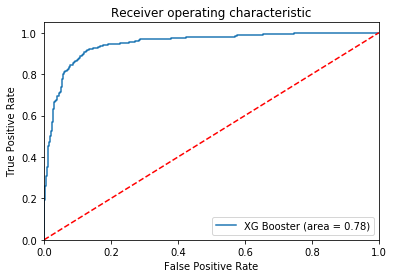

In [97]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
xgb_roc_auc = roc_auc_score(y_test1, xgb.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test1, xgb.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XG Booster (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

###### SUPPORT VECTOR MACHINE

In [8]:
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
svc = LinearSVC()
rfe = RFE(svc)
rfe = rfe.fit(X2, Y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True False False False False
 False False False False False False False False  True  True False False
  True  True  True  True]
[ 1  1  1  1  1  1  1  1  9 11  6 10  3  2 15  5 12  8  4 13  1  1 14  7
  1  1  1  1]


In [9]:
X2_col = X2.columns.values.tolist()

indices = 8,9,10,11,12,13,14,15,16,17,18,19,22,23
X2_col_mod_2 = [i for j, i in enumerate(X2_col) if j not in indices]
X2_mod_2 = X2[X2_col_mod_2]

In [11]:
from sklearn.svm import SVC, LinearSVC
# split into train and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,Y,test_size=0.2)
print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

#fit the model
svc.fit(X_train2,y_train2.values.ravel())

(8663, 28)
(8663, 1)
(2166, 28)
(2166, 1)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [12]:
cv_scores = cross_val_score(svc, X_train2, y_train2.values.ravel(), cv=5)
print(cv_scores)
mean_score=cv_scores.mean()
print("Mean:", mean_score)

[0.89901904 0.89901904 0.89901904 0.89901904 0.89948007]
Mean: 0.8991112475636062


In [13]:
y_pred2 = svc.predict(X_test2)
print('Accuracy of Linear Support Vector Machine Classifier on test set: {:.2f}'.format(svc.score(X_test2, y_test2)))

Accuracy of Linear Support Vector Machine Classifier on test set: 0.16


In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test2, y_pred2))
print(confusion_matrix(y_test2, y_pred2))

             precision    recall  f1-score   support

          0       0.99      0.07      0.13      1953
          1       0.10      0.99      0.19       213

avg / total       0.90      0.16      0.13      2166

[[ 132 1821]
 [   2  211]]
